# 3. Mosaic and Clip imagery

In [7]:
# Import required packages
from osgeo import gdal
import glob

#Build mosaic of pre-event imagery
!gdalbuildvrt pre_vrt_v3.vrt Pre-event-v3/*.tif


0...10...20...30...40...50...60...70...80...90...100 - done.


In [8]:
#Build mosaic of Post-event imagery
!gdalbuildvrt post_vrt_v3.vrt Post-event-v3/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [9]:
#info about each file
!gdalinfo post_vrt_v3.vrt
!gdalinfo pre_vrt_v3.vrt

Driver: VRT/Virtual Raster
Files: post_vrt_v3.vrt
       Post-event-v3/10300100ED11EA00_120202003312.tif
       Post-event-v3/10300100ED11EA00_120202003313.tif
       Post-event-v3/10300500E4F92300_120202003312.tif
       Post-event-v3/10300500E4F92300_120202003313.tif
Size is 33792, 17408
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 29N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 29N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-9,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMET

In [10]:
# create outline shp of post_event imagery - we will use this to clip pre-event imagery to align with post-event imagery
!gdaltindex post_vrt_outline_v3.shp post_vrt_v3.vrt

Creating new index file...


In [11]:
# use shp outline of post-event imagery to clip pre-vrt file
!gdalwarp -cutline post_vrt_outline_v3.shp -crop_to_cutline -of VRT pre_vrt_v3.vrt pre_vrt_clipped_v3.vrt

Creating output file that is 33792P x 17408L.
Processing pre_vrt_v3.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [1]:
# tile pre-vrt
!gdal_translate -co TILED=YES -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024 pre_vrt_clipped_v3.vrt pre_vrt_tiled_v3_v2.tif

Input file size is 33792, 17408
0...10...20...30...40...50...60...70...80...90...100 - done.


In [2]:
# tile post-vrt
!gdal_translate -co TILED=YES -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024 post_vrt_v3.vrt post_vrt_tiled_v3_v2.tif

Input file size is 33792, 17408
0...10...20...30...40...50...60...70...80...90...100 - done.


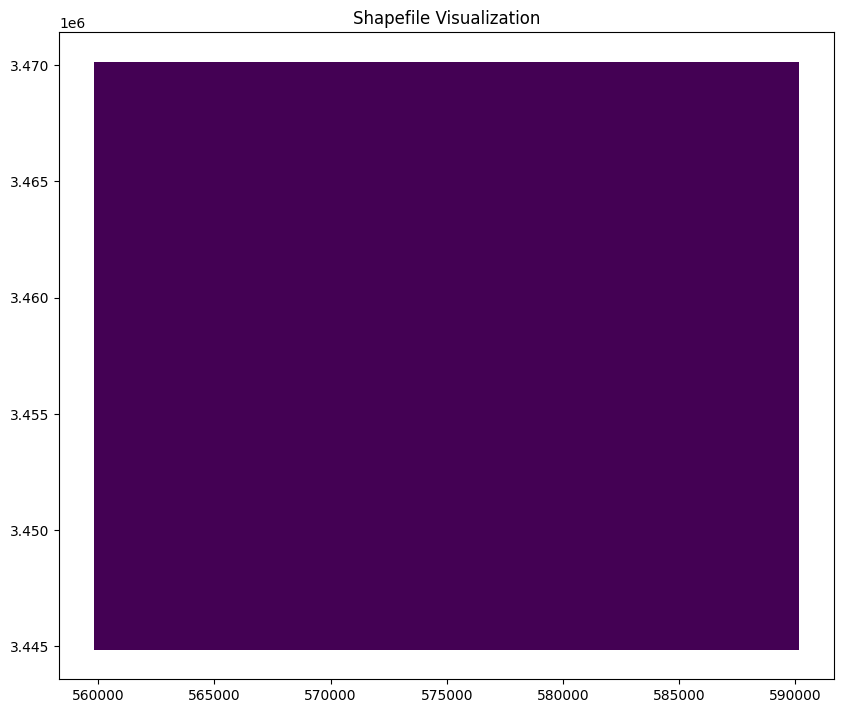

In [1]:
#Visualize Shapefiles

import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = 'post_vrt_outline_v3.shp'

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile data on the Matplotlib axis
gdf.plot(ax=ax, cmap='viridis')  # You can change the colormap as needed

# Add a title
plt.title('Shapefile Visualization')

# Display the plot
plt.show()


In [ ]:
# Visualize pre-event Raster imagery

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('pre_vrt_tiled_v3_v2.tif') as src:
    raster_data = src.read()  # Read the first band (change the index as needed)
    raster_data = raster_data.transpose((1, 2, 0))
    
    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot



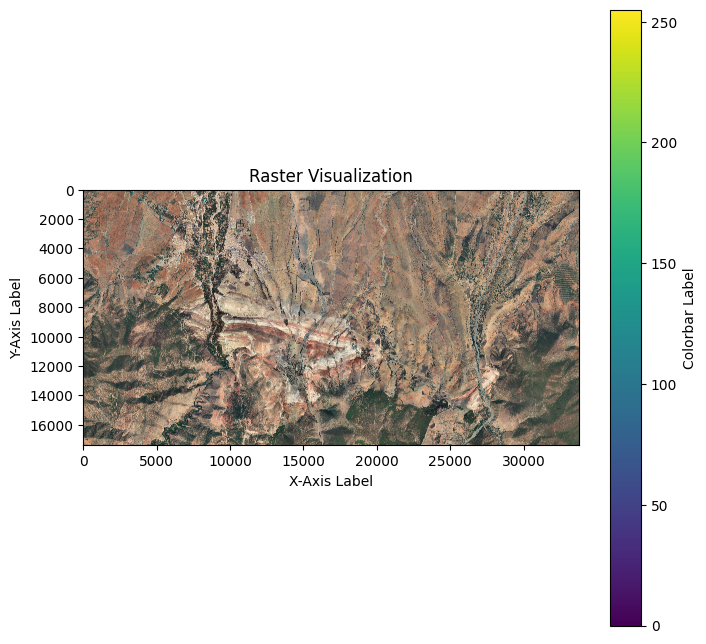

In [5]:
# Visualize pre-event Raster imagery

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('post_vrt_tiled_v3_v2.tif') as src:
    raster_data = src.read()  # Read the first band (change the index as needed)
    raster_data = raster_data.transpose((1, 2, 0))
    
    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot

